In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
training_dataset = "data/train.csv"
test_dataset = "data/test.csv"
num_words = 5000
max_length = 200
embedding_dim = 32
num_epochs=5

In [25]:
def get_dataset(filename, train=True):
    sentences = []
    labels = []
    label_position = 3 if train else 2
    with open(filename, "r") as f:
        reader = csv.reader(f, delimiter=",")
        next(reader)
        for tweet in reader:
            if tweet[label_position] != "neutral":
                sentences.append(tweet[1].strip())
                labels.append(convert_label(tweet[label_position]))
    return sentences, labels

def convert_label(label):
    if label == "negative":
        return 0
    return 1
            
training_sentences, training_labels = get_dataset(training_dataset, train=True)
testing_sentences, test_labels = get_dataset(test_dataset, train=False)


training_sentences = training_sentences + testing_sentences
training_labels = training_labels + test_labels

In [26]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(training_sentences)
vocab_size = len(tokenizer.word_index) + 1

In [27]:
def preprocess(tokenizer, sentences, max_length):
    encoded_docs = tokenizer.texts_to_sequences(sentences)
    return pad_sequences(encoded_docs, maxlen=max_length)

padded_training_sequence = preprocess(tokenizer, training_sentences, max_length)
#padded_testing_sequence = preprocess(tokenizer, testing_sentences, max_length)

In [36]:
import numpy as np
padded_training_sequence = tf.random.shuffle(np.array(padded_training_sequence), seed=8)
training_labels = tf.random.shuffle(np.array(training_labels), seed=8)
# padded_testing_sequence = np.array(padded_testing_sequence)
# test_labels = np.array(test_labels)

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [60]:
history = model.fit(padded_training_sequence, training_labels, validation_split=0.2, epochs=num_epochs)

Epoch 1/5
462/462 [==============================] - 26s 52ms/step - loss: 0.6925 - accuracy: 0.5302 - val_loss: 0.6331 - val_accuracy: 0.7334
Epoch 2/5
462/462 [==============================] - 22s 47ms/step - loss: 0.5801 - accuracy: 0.7471 - val_loss: 0.5067 - val_accuracy: 0.7596
Epoch 3/5
462/462 [==============================] - 23s 49ms/step - loss: 0.4643 - accuracy: 0.8331 - val_loss: 0.4401 - val_accuracy: 0.8327
Epoch 4/5
462/462 [==============================] - 24s 51ms/step - loss: 0.3972 - accuracy: 0.8693 - val_loss: 0.4006 - val_accuracy: 0.8427
Epoch 5/5
462/462 [==============================] - 21s 44ms/step - loss: 0.3538 - accuracy: 0.8801 - val_loss: 0.3748 - val_accuracy: 0.8487


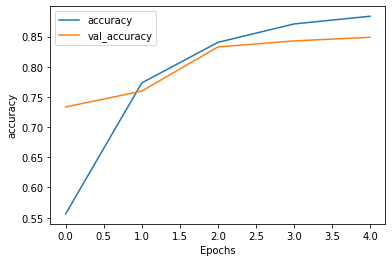

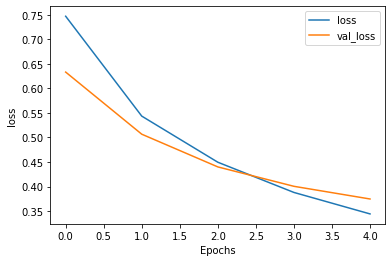

In [61]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [84]:
training_sentences, training_labels = get_dataset(training_dataset, train=True)
testing_sentences, test_labels = get_dataset(test_dataset, train=False)

In [85]:
data = []
for i in range(len(training_sentences)):
    data.append([training_sentences[i]]+[training_labels[i]])
for i in range(len(testing_sentences)):
    data.append([testing_sentences[i]]+[test_labels[i]])

In [86]:
len(data)*0.2

3693.4

In [87]:
import random
random.shuffle(data)

In [88]:
train, test = data[3693:], data[:3693]

In [89]:
with open("data4/train.csv", "w+") as f:
    writer = csv.writer(f, delimiter=",")
    train = [["tweet", "sentiment"]] + train
    writer.writerows(train)

In [90]:
with open("data4/test.csv", "w+") as f:
    writer = csv.writer(f, delimiter=",")
    test = [["tweet", "sentiment"]] + test
    writer.writerows(test)

In [96]:
def preprocess(tokenizer, sentences, max_length=200):
    encoded_docs = tokenizer.texts_to_sequences(sentences)
    return pad_sequences(encoded_docs, maxlen=max_length)

In [102]:
import json
json.dumps([[int(y) for y in list(x)] for x in list(preprocess(tokenizer, ["ssssdasd"], max_length=200))])

'[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]'

In [105]:
json.loads(b'{\n    "predictions": [[0.627761483]\n    ]\n}')['predictions'][0][0]

[0.627761483]